# **Clustering Pokemon Dataset - Mizwar**

## **Domain Proyek**

* Pada proyek kali ini, saya akan melakukan metode Unsupervised Learning dengan algoritma Clustering pada data Pokemon milik akun https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6#file-pokemon-csv . Dataset pokemon, saya download kemudian mengupload kembali ke akun github saya sendiri untuk selanjutnya load dataset melalui link github tersebut.

* Game Pokemon adalah salah satu game populer di dunia saat ini, salah satu game populer adalah 'Pokemon Go'. Ini merupakan game berbasis augmented-reality yang dikembangkan oleh Pokemon Company bekerja sama dengan Nintendo dan Niantic *.








* Masalah yang ingin saya teliti adalah terkait 'Hero' pada Pokemon, saya ingin melihat cluster/pengelompokan 'Attack' dan 'Defence' pada 'Hero' dataset Pokemon.

*Artikel ini telah tayang di Kompas.com dengan judul "Apa Itu Pokemon Go?", Klik untuk baca: https://tekno.kompas.com/read/2016/07/09/13200047/apa.itu.pokemon.go.?page=all.
Penulis : Deliusno

## **Data Loading**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as 
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [23]:
# load the dataset
url = 'https://raw.githubusercontent.com/Mizwar90/Pokemon-Predictive-Analytics/main/pokemon.csv'
data = pd.read_csv(url)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## **Exploratory Data Analysis - Deskripsi Variabel**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Dari output terlihat bahwa:

* Terdapat 3 kolom dengan tipe object, yaitu: Name, Type 1 dan Type 2. Kolom ini merupakan categorical features (fitur non-numerik).

* Terdapat 1 kolom dengan tipe data bool yaitu: Legendary. Ini merupakan fitur untuk menentukan benar dan salah dalam data.

* Terdapat 9 kolom numerik dengan tipe data int64, kolom Attack dan Defense adalah target fitur kita.

### Membuat salinan dataframe dengan dua kolom yaitu attack dan defense

In [25]:
df = data[['Attack', 'Defense']]
df

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43
...,...,...
795,100,150
796,160,110
797,110,60
798,160,60


## **Melakukan transformasi pada data**

### Cek missing value

In [26]:
df.isnull().sum()

Attack     0
Defense    0
dtype: int64

### Cek nilai pencilan/outlier

Pencilan/Outlier adalah data atau pengamatan yang tampak menyimpang secara nyata dari pengamatan lain dalam sampel. Biasanya pencilan terletak jauh atau sangat berbeda dari nilai-nilai lain dalam sampel acak dari suatu populasi.

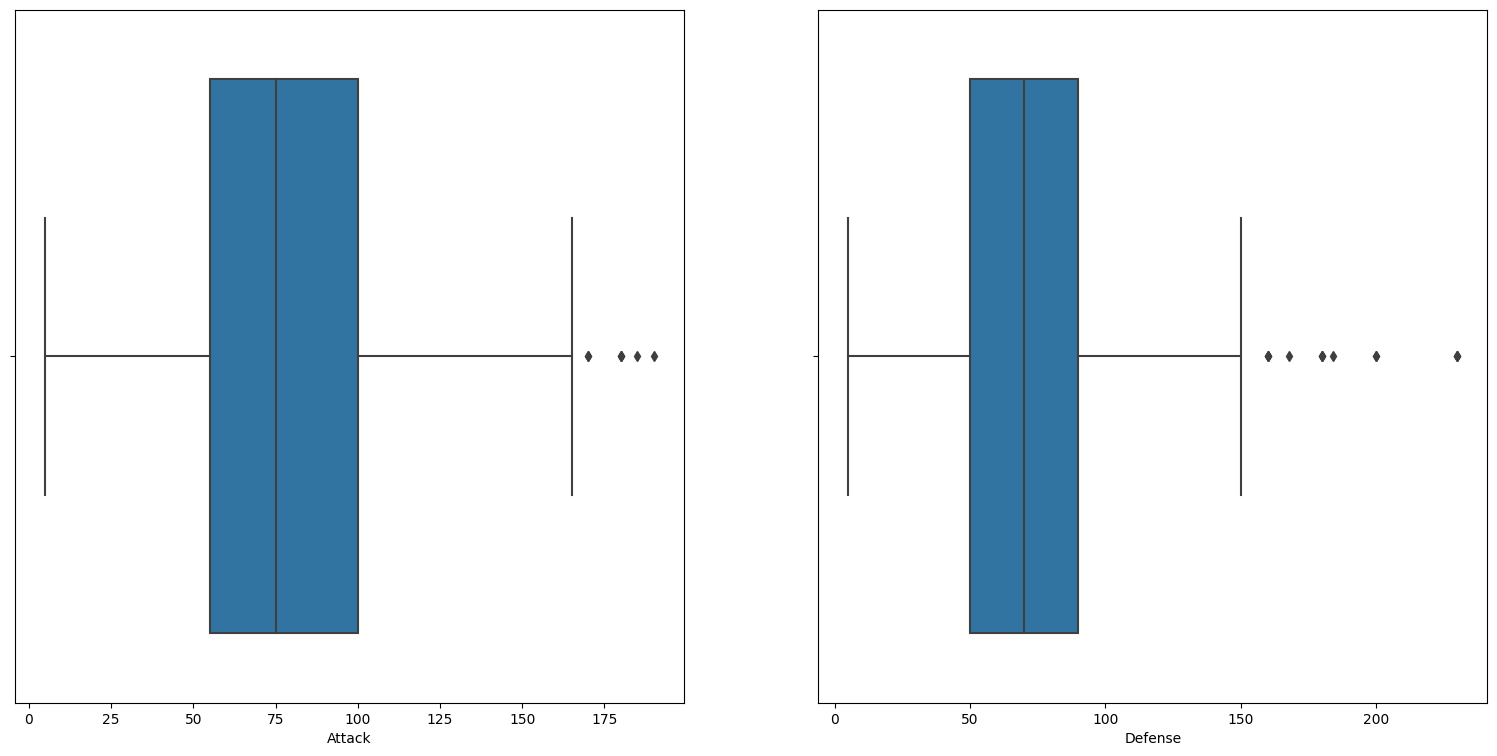

In [27]:

fig = plt.figure(figsize=(19, 9))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Attack', data = df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'Defense', data = df)

plt.show()

## **Menangani Missing Value**

### Membuat fungsi untuk menangani outlier dengan teknik IQR method

IQR adalah singkatan dari Inter Quartile Range. Untuk memahami apa itu IQR, mari kita ingat lagi konsep kuartil. Kuartil dari suatu populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat dari data berada di bawah kuartil pertama (Q1), setengah dari data berada di bawah kuartil kedua (Q2), dan tiga perempat dari data berada di kuartil ketiga (Q3). Dengan demikian interquartile range atau IQR = Q3 - Q1.

In [28]:
def get_lower_upper(x):
  Q1 = np.percentile(x, 25)
  Q3 = np.percentile(x, 75)
  IQR = Q3 - Q1
  lower = Q1 - (IQR*1.5)
  upper = Q3 + (IQR*1.5)

  return lower, upper

In [29]:
def get_outlier(x):
  lower, upper = get_lower_upper(x)

  return x[(x > lower) & (x < upper)]

In [30]:
df['Attack'] = get_outlier(df['Attack'])

df['Defense'] = get_outlier(df['Defense'])

<ipython-input-30-82fdbb40c03d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack'] = get_outlier(df['Attack'])
<ipython-input-30-82fdbb40c03d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Defense'] = get_outlier(df['Defense'])


### Menangani Missing Value dengan fungsi dropna

In [31]:
df = df.dropna()
df

,Attack,Defense
0,49.0,49.0
1,62.0,63.0
2,82.0,83.0
3,100.0,123.0
4,52.0,43.0
...,...,...
794,100.0,121.0
796,160.0,110.0
797,110.0,60.0
798,160.0,60.0


### Cek nilai pencilan/outlier kembali

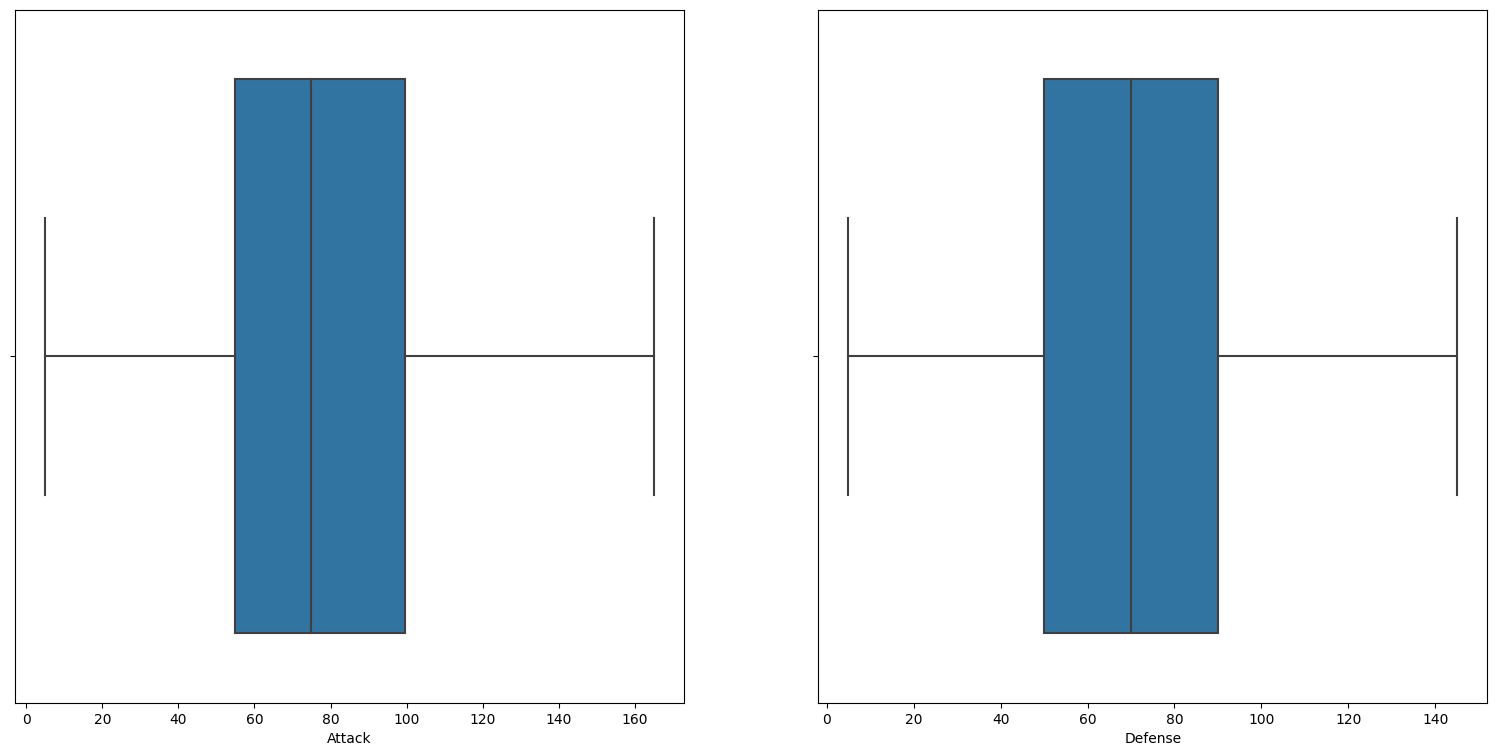

In [32]:
fig = plt.figure(figsize=(19, 9))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Attack', data = df)

plt.subplot(1, 2, 2)
sns.boxplot(x = 'Defense', data = df)

plt.show()

## **Data scaling/normalisasi data**


In [33]:
scal = df[["Attack", "Defense"]]
scal

,Attack,Defense
0,49.0,49.0
1,62.0,63.0
2,82.0,83.0
3,100.0,123.0
4,52.0,43.0
...,...,...
794,100.0,121.0
796,160.0,110.0
797,110.0,60.0
798,160.0,60.0


### Cek data sebelum scaling dengan fungsi describe dan histogram

           Attack     Defense
count  774.000000  774.000000
mean    77.813953   71.074935
std     30.930402   26.431186
min      5.000000    5.000000
25%     55.000000   50.000000
50%     75.000000   70.000000
75%     99.500000   90.000000
max    165.000000  145.000000


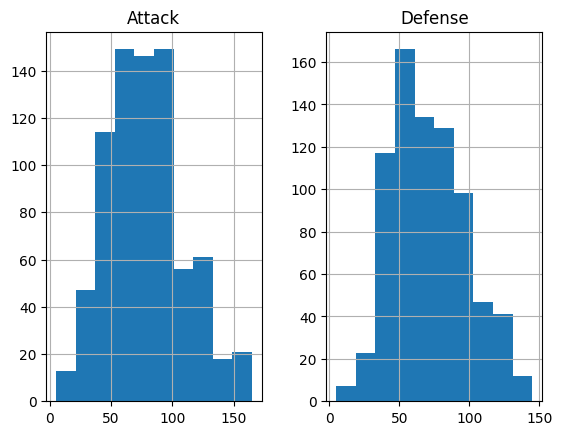

In [34]:
print(scal.describe())
scal.hist()
pyplot.show()

### Data sesudah scaling menggunakan fungsi StandarScaler

                0             1
count  774.000000  7.740000e+02
mean     0.000000  1.009815e-16
std      1.000647  1.000647e+00
min     -2.355645 -2.501502e+00
25%     -0.738067 -7.978667e-01
50%     -0.091036 -4.069551e-02
75%      0.701577  7.164757e-01
max      2.820604  2.798696e+00


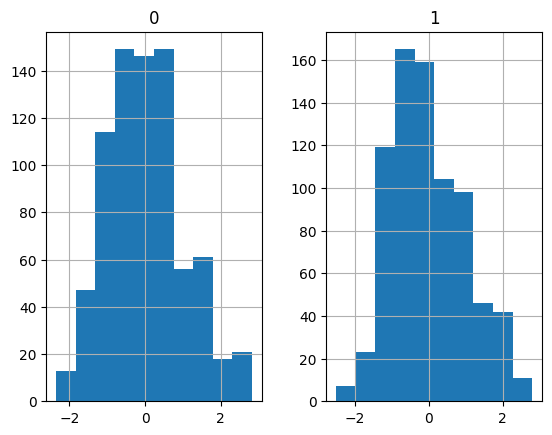

,0,1
0,-0.932176,-0.835725
1,-0.511606,-0.305705
2,0.135425,0.451466
3,0.717753,1.965808
4,-0.835122,-1.062877
...,...,...
769,0.717753,1.890091
770,2.658846,1.473647
771,1.041269,-0.419281
772,2.658846,-0.419281


In [35]:
# perform a robust scaler transform of the dataset
trans = StandardScaler()
scal2 = trans.fit_transform(scal)
# convert the array back to a dataframe
dataset = DataFrame(scal2)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()
dataset

##**Clustering menggunakan K-Means**


K-Means clustering adalah algoritma unsupervised learning yang dipakai untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda. Simbol K pada K-means clustering menandakan jumlah kluster yang digunakan. 

Adapun kelebihan dari algoritma K-Means adalah sebagai berikut:
* Relatif sederhana dan mudah untuk diterapkan.
* Dapat diskalakan untuk dataset dalam jumlah besar.
* Mudah beradaptasi dengan contoh baru.
* Umum diimplementasikan ke cluster dengan bentuk dan ukuran yang berbeda, seperti cluster elips.

Adapun kelemahan atau kekurangan dari algoritma K-means di antaranya:
* Perlu menentukan nilai k secara manual
* Sangat bergantung pada inisialisasi awal. Jika nilai random untuk inisialisasi kurang baik, maka pengelompokkan yang dihasilkan pun menjadi kurang optimal.
* Dapat terjadi curse of dimensionality. Masalah ini timbul jika dataset memiliki dimensi yang sangat tinggi. Cara kerja algoritma ini adalah mencari jarak terdekat antara k buah titik dengan titik lainnya. Mencari jarak antar titik pada 2 dimensi, kemungkinan masih mudah dilakukan. Namun apabila dimensi bertambah menjadi 20 tentunya hal ini akan menjadi sulit.
* K-means mengalami kesulitan mengelompokkan data di mana cluster memiliki ukuran dan kepadatan yang bervariasi.

Berikut adalah beberapa penerapan dari K-means clustering

* Segmentasi pasar
* Pengelompokan dokumen
* Segmentasi gambar
* Kompresi gambar
* Kuantisasi vektor
* Analisis klaster
* Identifikasi daerah rawan kejahatan
* Deteksi penipuan asuransi
* Analisis data angkutan umum
* Pengelompokan aset IT
* Segmentasi pelanggan
* Mengidentifikasi data kanker

Referensi: https://www.trivusi.web.id/2022/06/algoritma-kmeans-clustering.html#:~:text=Pengertian%20K%2Dmeans%20Clustering,-K%2DMeans%20clustering&text=Simbol%20K%20pada%20K%2Dmeans,dikumpulkan%20bersama%20karena%20kesamaan%20tertentu.

### Jumlah cluster 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


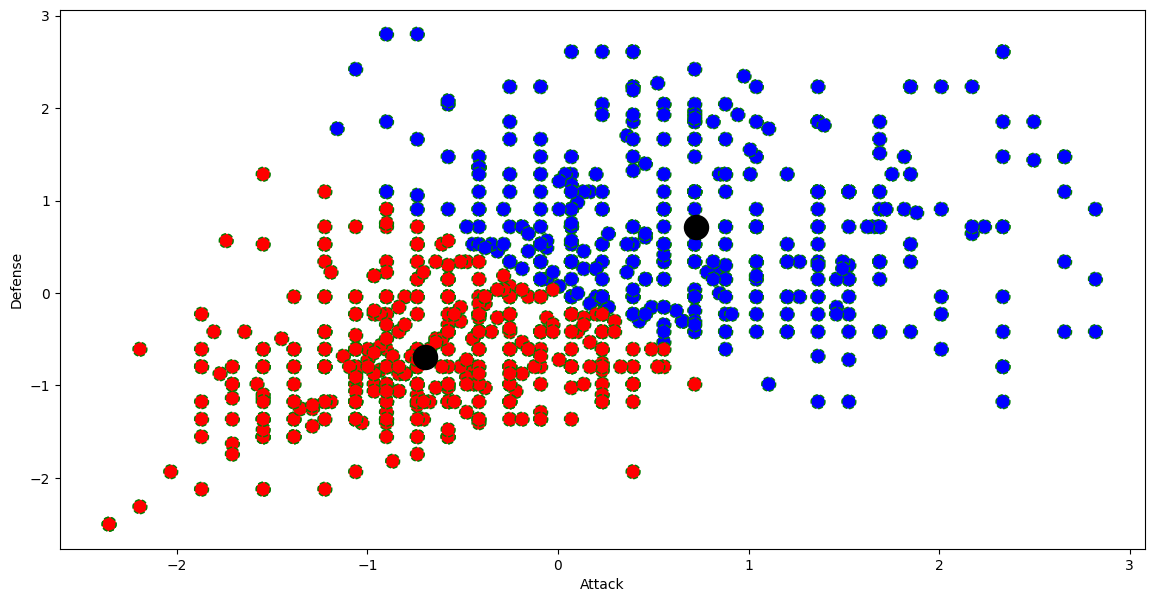

In [36]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(scal2)
labels = kmeans.labels_

new_scal2 = pd.DataFrame(data = scal2, columns = ['Attack','Defense'])
new_scal2['label_kmeans'] = labels


fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(new_scal2["Attack"][new_scal2["label_kmeans"] == 0], new_scal2["Defense"][new_scal2["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_scal2["Attack"][new_scal2["label_kmeans"] == 1], new_scal2["Defense"][new_scal2["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
#plt.scatter(new_scal2["Attack"][new_scal2["label_kmeans"] == 2], new_scal2["Defense"][new_scal2["label_kmeans"] == 2], 
#            color = "green", s=100, edgecolor='green',linestyle='--')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300);
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
plt.show()

### Membuat fungsi Metode Elbow

Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster yang akan membentuk siku pada suatu titik.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

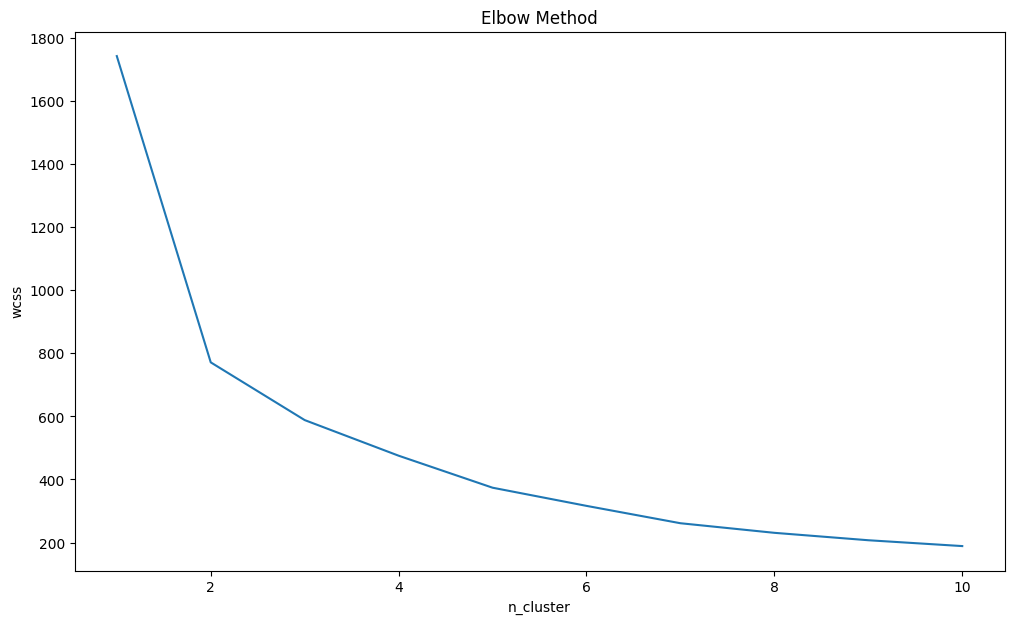

In [37]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(new_scal2)
  wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12,7))  
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.show()

### Jumlah cluster 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


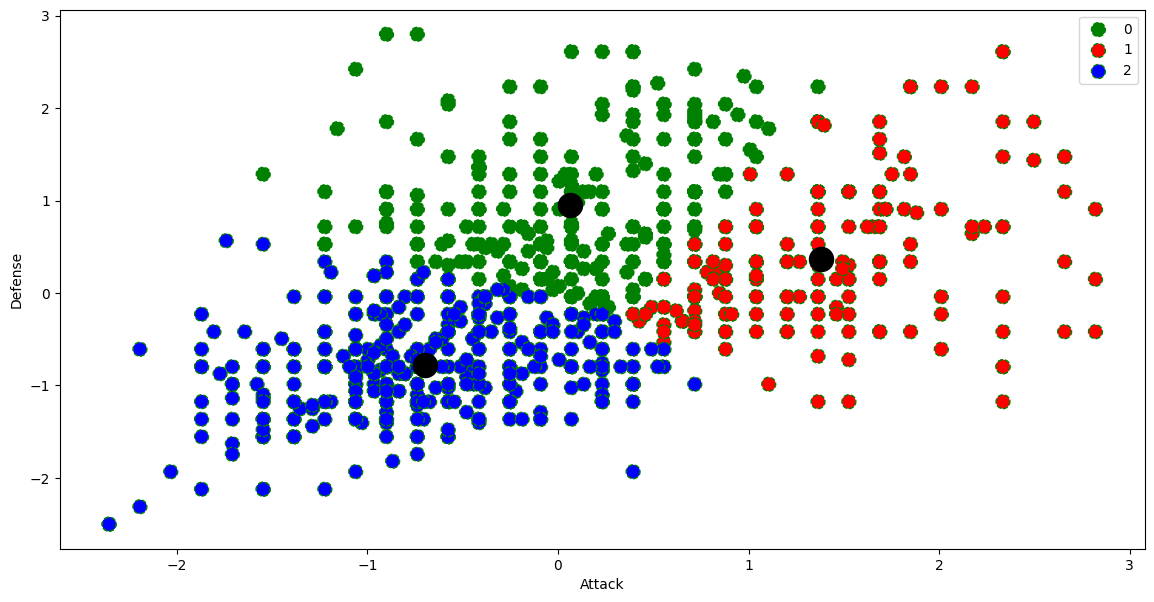

In [38]:
kmeans2 = KMeans(n_clusters=3, random_state=42).fit(scal2)
labels2 = kmeans2.labels_

new_scal3 = pd.DataFrame(data = scal2, columns = ['Attack','Defense'])
new_scal3['label_kmeans2'] = labels2


fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(new_scal3["Attack"][new_scal3["label_kmeans2"] == 0], new_scal3["Defense"][new_scal3["label_kmeans2"] == 0], 
            color = "green", s=100, edgecolor='green',linestyle='--', label = 0)
plt.scatter(new_scal3["Attack"][new_scal3["label_kmeans2"] == 2], new_scal3["Defense"][new_scal3["label_kmeans2"] == 2], 
            color = "red", s=100, edgecolor='green',linestyle='--', label = 1)
plt.scatter(new_scal3["Attack"][new_scal3["label_kmeans2"] == 1], new_scal3["Defense"][new_scal3["label_kmeans2"] == 1], 
            color = "blue", s=100, edgecolor='green',linestyle='--', label = 2)


centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300);
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.legend()
plt.show()

### Jumlah cluster 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


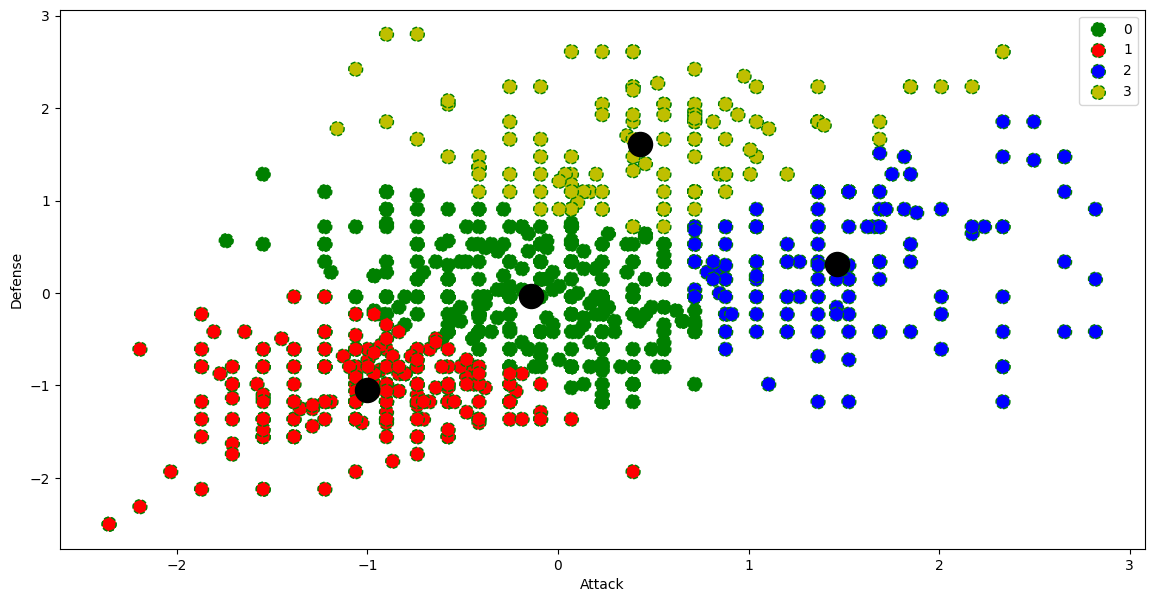

In [46]:
kmeans3 = KMeans(n_clusters=4, random_state=42).fit(scal2)
labels3 = kmeans3.labels_

new_scal4 = pd.DataFrame(data = scal2, columns = ['Attack','Defense'])
new_scal4['label_kmeans3'] = labels3


fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(new_scal4["Attack"][new_scal4["label_kmeans3"] == 0], new_scal4["Defense"][new_scal4["label_kmeans3"] == 0], 
            color = "green", s=100, edgecolor='green',linestyle='--', label = 0)
plt.scatter(new_scal4["Attack"][new_scal4["label_kmeans3"] == 2], new_scal4["Defense"][new_scal4["label_kmeans3"] == 2], 
            color = "red", s=100, edgecolor='green',linestyle='--', label = 1)
plt.scatter(new_scal4["Attack"][new_scal4["label_kmeans3"] == 1], new_scal4["Defense"][new_scal4["label_kmeans3"] == 1], 
            color = "blue", s=100, edgecolor='green',linestyle='--', label = 2)
plt.scatter(new_scal4["Attack"][new_scal4["label_kmeans3"] == 3], new_scal4["Defense"][new_scal4["label_kmeans3"] == 3], 
            color = "y", s=100, edgecolor='green',linestyle='--', label = 3)


centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300);
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.legend()
plt.show()

##**Silhouette Score**

Skor Silhouette dalam algoritma pengelompokan K-Means adalah antara -1 dan 1. Skor ini menunjukkan seberapa baik titik data telah dikelompokkan, dan skor di atas 0 dianggap baik, sedangkan poin negatif berarti algoritme K-means Anda telah menempatkannya di titik data cluster yang salah)

In [47]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_scal2, labels = labels))
print(silhouette_score(new_scal3, labels = labels2))
print(silhouette_score(new_scal4, labels = labels3))

0.3049859598472535
0.5315732803442852
0.5967848800416774


Dari hasil klustering diatas, kita dapat mengambil kesimpulan sebagai berikut:

* Berdasarkan **Elbow Method** kita dapat mengambil **jumlah cluster optimal sebesar 2 cluster** karna lebih mencerminkan segmentasi kelompok data defence dan attack secara keseluruhan jika kita mengeneralisasi data.

* Berdasarkan metrik **silhouette score**, yang mendekati nilai 1 adalah cluster yang berjumlah 4 yang menggunakan algoritma K-Means. 

Kesimpulan: Kedua metode diatas bisa digunakan salah satu atau keduanya tergantung permasalahan apa yang ingin dipecahkan. Disini saya ingin menjabarkan hasil yang didapatkan clustering (pengelompokan) algoritma K-Means yang memiliki jumlah cluster 4. Sekilas dapat kita lihat visualisasi, jika semakin kecil attack maka semakin kecil pula defence dan semakin besar attack maka semakin besar pula defence. Hanya sebagian kecil cluster 3 (color = yellow) defence tinggi namun attack berada di tengah, begitu pula cluster 2 (color = blue) attack tinggi namun defence berada di tengah. **Secara keseluruhan, dapat disimpulkan 'Attack' dan 'Defence' pada 'Hero' dataset pokemon berbanding lurus jika dilihat dari pengelompokan yang ada**.